In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
from tensorflow.keras import Input, Model 
from tensorflow.keras.layers import BatchNormalization, Concatenate, Conv2D, concatenate
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import InputLayer, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, Loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2, l1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import PIL
%matplotlib inline



In [3]:
seed = 42
path = 'D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/'

In [4]:
#os.mkdir(path+'NeuralNet_Gender')

In [5]:
#!unzip -q '/content/gdrive/My Drive/Kaggle/I2A2_Bone_Regression/i2a2-bone-age-regression.zip' -d '/content/gdrive/My Drive/Kaggle/I2A2_Bone_Regression/'

In [6]:
train_df = pd.read_csv(path+'i2a2-bone-age-regression/train.csv')
test_df = pd.read_csv(path+'i2a2-bone-age-regression/test.csv')
print(train_df.shape)
print(test_df.shape)

(12611, 3)
(249, 2)


In [7]:
train_df = train_df.join(pd.get_dummies(train_df['patientSex'], prefix='patientSex'))

In [8]:
train_df.head()

,fileName,patientSex,boneage,patientSex_F,patientSex_M
0,1377.png,F,180,1,0
1,1378.png,F,12,1,0
2,1379.png,F,94,1,0
3,1380.png,M,120,0,1
4,1381.png,F,82,1,0


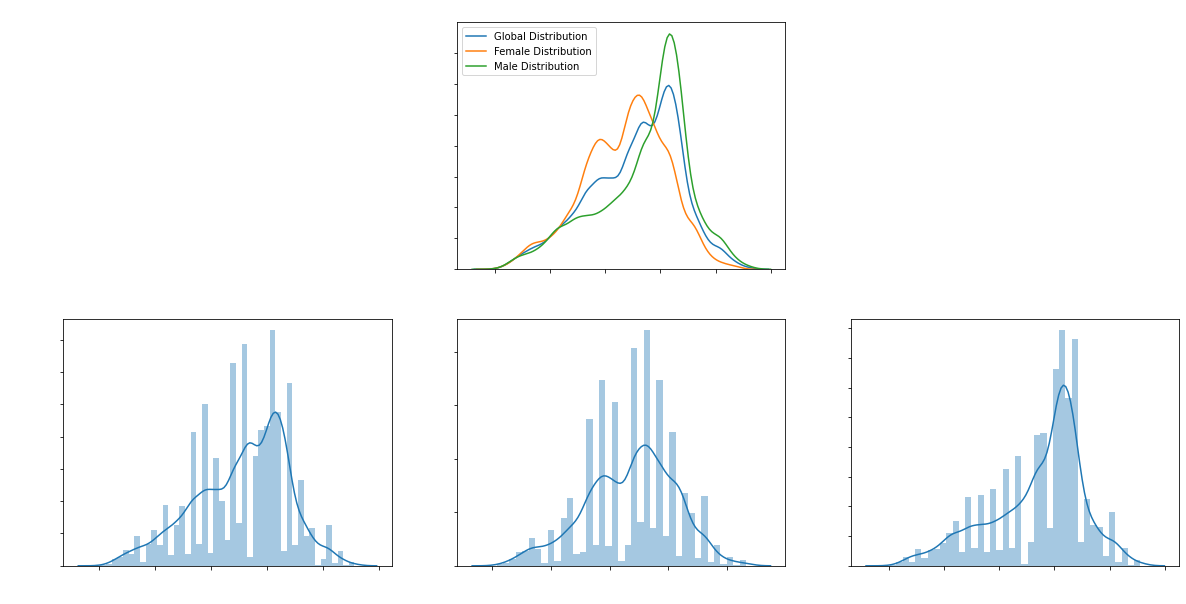

In [9]:
plt.figure(figsize=(20, 10))

plt.subplot(232)
ax = sns.kdeplot(train_df['boneage'], label='Global Distribution')
ax = sns.kdeplot(train_df.loc[train_df.patientSex=='F']['boneage'], label='Female Distribution')
ax = sns.kdeplot(train_df.loc[train_df.patientSex=='M']['boneage'], label='Male Distribution')
ax.set_title('Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_xlabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(234)
ax = sns.distplot(train_df['boneage'])
ax.set_title('Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(235)
ax = sns.distplot(train_df.loc[train_df.patientSex=='F']['boneage'])
ax.set_title('Female - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(236)
ax = sns.distplot(train_df.loc[train_df.patientSex=='M']['boneage'])
ax.set_title('Male - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.show()

In [10]:
print('Statistics - Global - Bone Age')
train_df['boneage'].describe()

Statistics - Global - Bone Age


count    12611.000000
mean       127.320752
std         41.182021
min          1.000000
25%         96.000000
50%        132.000000
75%        156.000000
max        228.000000
Name: boneage, dtype: float64

In [11]:
print('Statistics - Female - Bone Age')
train_df.loc[train_df.patientSex=='F']['boneage'].describe()

Statistics - Female - Bone Age


count    5778.000000
mean      117.880235
std        37.908112
min         4.000000
25%        94.000000
50%       120.000000
75%       144.000000
max       216.000000
Name: boneage, dtype: float64

In [12]:
print('Statistics - Female - Bone Age')
train_df.loc[train_df.patientSex=='M']['boneage'].describe()

Statistics - Female - Bone Age


count    6833.000000
mean      135.303673
std        42.143162
min         1.000000
25%       108.000000
50%       150.000000
75%       162.000000
max       228.000000
Name: boneage, dtype: float64

In [13]:
test_df[test_df['patientSex'] =='F'].shape

(141, 2)

In [14]:
test_df[test_df['patientSex'] =='M'].shape

(108, 2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_df[["fileName", "patientSex_F", "patientSex_M"]],train_df["boneage"], test_size = 0.15, random_state = seed)
X_train.shape

(10719, 3)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.15, random_state = seed)
X_train.shape
training_df = X_train.join(y_train)

validating_df = X_valid.join(y_valid)

In [17]:
training_df.head()

,fileName,patientSex_F,patientSex_M,boneage
7320,9695.png,0,1,192
11511,14391.png,0,1,24
4246,6272.png,0,1,174
6163,8411.png,0,1,168
3182,5109.png,0,1,84


In [18]:
validating_df.head()

,fileName,patientSex_F,patientSex_M,boneage
3863,5858.png,0,1,168
7924,10367.png,1,0,120
6728,9034.png,0,1,126
5443,7610.png,0,1,156
8156,10632.png,0,1,165


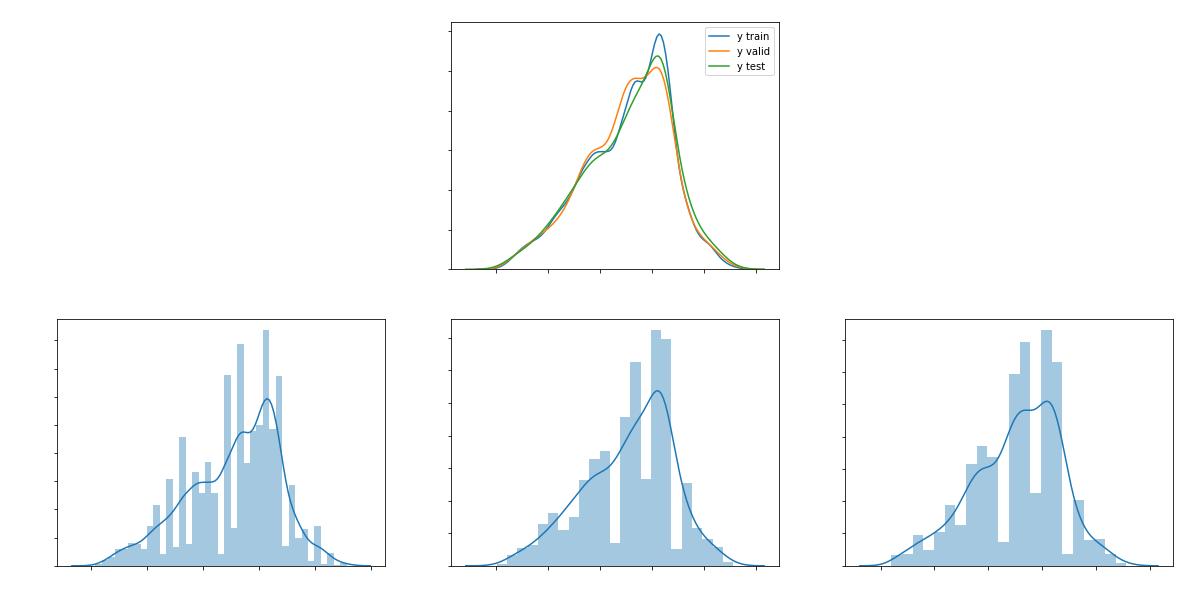

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(232)
ax = sns.kdeplot(y_train, label='y train')
ax = sns.kdeplot(y_valid, label='y valid')
ax = sns.kdeplot(y_test, label='y test')
ax.set_title('train/test/validation - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(234)
ax = sns.distplot(y_train)
ax.set_title('Y_train - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(235)
ax = sns.distplot(y_test)
ax.set_title('y_test -  - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.subplot(236)
ax = sns.distplot(y_valid)
ax.set_title('y_valid - Bone Age Distribution', color='w')
ax.set_xlabel('bone age', color='w')
ax.set_ylabel('frequency', color='w')
ax.tick_params(labelcolor='w')

plt.show()


In [122]:
img_size = (299)
batch_size = 15
patientSex_weight = 500

rotation_range = 20
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
shear_range = 0.1
zoom_range = [0.4,0.5]


datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        fill_mode='nearest',rescale=1./255)#validation_split=0.25)

def gen_flow_for_two_inputs(mult_imp_df):
    data_iter=datagen.flow_from_dataframe(dataframe=mult_imp_df, 
                                          directory='D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/i2a2-bone-age-regression/images', 
                                          x_col='fileName', y_col=(['boneage','patientSex_F','patientSex_M']), class_mode="raw", 
                                          target_size=(img_size,img_size), color_mode='rgb', batch_size=batch_size, seed=seed)

    while True:
            mult_input_data = data_iter.next()
            #X2i = train_gender.next()
            
            return ([mult_input_data[0], mult_input_data[1][:,1:3]]*patientSex_weight, mult_input_data[1][:,0])
            
gen_flow = gen_flow_for_two_inputs(training_df)

gen_flow_train = gen_flow_for_two_inputs(validating_df)

Found 9111 validated image filenames.
Found 1608 validated image filenames.


In [21]:
#pretrained_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_size,img_size,3))

In [22]:
#img_size = (224)
#pretrained_model = DenseNet121(include_top=False,weights="imagenet", input_shape=(img_size,img_size,3),)

In [23]:
pretrained_model = Xception(include_top=False, weights="imagenet",input_shape=(img_size,img_size,3),)

In [24]:
number_of_frozen_layers = 0
for i, layer in enumerate(pretrained_model.layers):
    if i>=number_of_frozen_layers:
        break
    layer.trainable = False

In [132]:
img_size = (299)

input_img = Input(shape=(img_size, img_size, 3))
input_patientSex = Input(shape=(2,))

#x = tf.keras.applications.xception.preprocess_input(inputs)
#x = pretrained_model(input_img)

#x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input_img)
#x = BatchNormalization()(x)
#x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
#x = BatchNormalization()(x)
#x = Concatenate(axis=-1)([input_img, x])
#x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

y = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_img)
#y = BatchNormalization()(y)
y = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(y)
#y = BatchNormalization()(y)
y = Concatenate(axis=-1)([input_img, y])
y = MaxPool2D(pool_size=(3, 3), strides=2)(y)

z = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(y)
#z = BatchNormalization()(z)
z = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(z)
#z = BatchNormalization()(z)
z = Concatenate(axis=-1)([y, z])
z = MaxPool2D(pool_size=(3, 3), strides=2)(z)

l = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(z)
#l = BatchNormalization()(l)
l = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(l)
#l = BatchNormalization()(l)
l = Concatenate(axis=-1)([z, l])
l = MaxPool2D(pool_size=(3, 3), strides=2)(l)

m = Conv2D(filters=384, kernel_size=3, padding='same', activation='relu')(l)
#m = BatchNormalization()(m)
m = Conv2D(filters=384, kernel_size=3, padding='same', activation='relu')(m)
#m = BatchNormalization()(m)
m = Concatenate(axis=-1)([l,m])
m = MaxPool2D(pool_size=(3, 3), strides=2)(m)

n = GlobalAveragePooling2D()(l)

b = concatenate([n,input_patientSex])

f = Dense(2048, activation  =  'relu')(b)
#f = Dropout(rate=0.2, seed=42)(f)
f = Dense(1024, activation  =  'relu')(f)
#f = Dropout(rate=0.2, seed=42)(f)
f = Dense(512, activation  =  'relu')(f)
#f = Dropout(rate=0.2, seed=42)(f)
f = Dense(1, activation  =  'linear')(f)

model = Model([input_img, input_patientSex],f)
model.summary()

#for layer in model.layers:
#  layer.kernel_regularizer = l2(1e-4)

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 299, 299, 64) 1792        input_48[0][0]                   
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 299, 299, 64) 36928       conv2d_142[0][0]                 
__________________________________________________________________________________________________
concatenate_88 (Concatenate)    (None, 299, 299, 67) 0           input_48[0][0]                   
                                                                 conv2d_143[0][0]          

In [133]:
#batch_size = 40
num_epochs = 200
learning_rate = 1e-3

weights_filepath = path+'NeuralNet_Gender/model.12-06--{epoch:02d}-{val_loss:.2f}.h5'


callbacks = [ModelCheckpoint(weights_filepath, monitor='val_loss', mode='min', verbose=2, save_best_only=True, save_freq='epoch'), 
             ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=2, mode="min", min_delta=0.01, cooldown=5, min_lr=0),]
             #EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)]

mse = MeanSquaredError()        

model.compile(loss = mse, optimizer = Adam(lr = learning_rate), metrics = ['acc'])

In [134]:
#weights_filepath = model.load_weights('D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/NeuralNet_Gender/model.12-06--194-3121.89.h5')

history = model.fit(gen_flow[0], gen_flow[1], epochs=num_epochs, verbose=2, validation_data=(gen_flow_train[0], gen_flow_train[1]), 
                    shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, callbacks=callbacks)


Train on 15 samples, validate on 15 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 17281.08008, saving model to D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/NeuralNet_Gender/model.12-06--01-17281.08.h5
15/15 - 5s - loss: 17255.7754 - acc: 0.0000e+00 - val_loss: 17281.0801 - val_acc: 0.0000e+00
Epoch 2/200

Epoch 00002: val_loss improved from 17281.08008 to 15434.20410, saving model to D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/NeuralNet_Gender/model.12-06--02-15434.20.h5
15/15 - 1s - loss: 16929.8535 - acc: 0.0000e+00 - val_loss: 15434.2041 - val_acc: 0.0000e+00
Epoch 3/200

Epoch 00003: val_loss improved from 15434.20410 to 7493.52832, saving model to D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/NeuralNet_Gender/model.12-06--03-7493.53.h5
15/15 - 1s - loss: 14671.9688 - acc: 0.0000e+00 - val_loss: 7493.5283 - val_acc: 0.0000e+00
Epoch 4/200

Epoch 00004: val_loss did not 

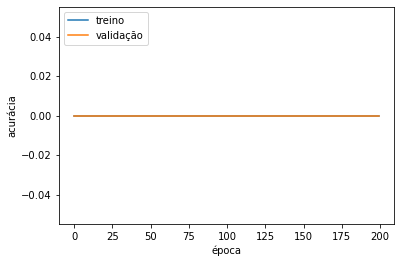

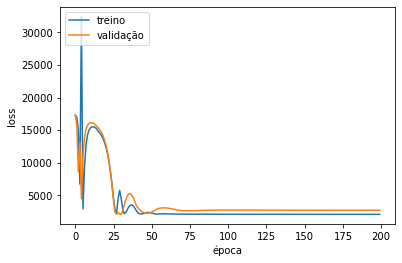

In [130]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

In [60]:
X = []
for i in tqdm(X_test['fileName']):
    im = Image.open(os.path.join('D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/i2a2-bone-age-regression/images/',i)).convert("RGB")
    im = im.resize((img_size,img_size))
    im = np.asarray(im)
    #im = np.expand_dims(im, axis=2)
    X.append(im)
X_tt = np.stack(X,axis=0) 
nnn = model.predict((X_tt,X_test[['patientSex_F','patientSex_M']])) 

print(nnn)

model.evaluate(X_tt, y_test)



  3%|██▌                                                                             | 61/1892 [00:02<01:16, 24.08it/s]


KeyboardInterrupt: 

In [ ]:
model.save("/content/gdrive/My Drive/Kaggle/I2A2_Bone_Regression/NeuralNet/my_h5_model.h5")

In [ ]:
model.load_weights('/content/gdrive/My Drive/Kaggle/I2A2_Bone_Regression/NeuralNet_reccurent/model.10-06-10-89.17.h5')

In [ ]:
img_size = 299
X = []
for i in tqdm(test_df['fileName']):
    im = Image.open(os.path.join('D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/i2a2-bone-age-regression/images/',i)).convert("RGB")
    im = im.resize((img_size,img_size))
    im = np.asarray(im)/255
    #im = np.expand_dims(im, axis=2)
    X.append(im)
X_t = np.stack(X,axis=0) 


In [ ]:
#model = tf.keras.models.load_model('/content/my_h5_model.h5')
#model.load_weights('/content/my_h5_model.h5')
y_t = model.predict(X_t,X_test[['patientSex_F','patientSex_M']],verbose=1)
#y_t = y_t*max_stats
print(y_t)

In [ ]:
test_df['boneage'] = y_t
test_df.drop(['patientSex'],axis=1,inplace=True)
print(test_df.head())
test_df.to_csv('D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/submission.csv',index=False)

In [ ]:
ax1 = sns.distplot(y_t)
plt.show()